![](power_wind.jpeg)

# Machine Learning and Statistics - Project 2020
***

### Karolina Szafran-Belzowska, G00376368
***

In [2]:
# import required packages

import pandas as pd # reads in the csv and displays in a pandas dataframe
import numpy as np
import seaborn as sns # plots
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # normalizes the data

## Part 1:  Explore the data

In [2]:
# import csv file
df = pd.read_csv('powerproduction.csv')
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# describe the data
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [4]:
# 
# https://datascienceplus.com/machine-learning-with-python-scikit-learn-part-1/, 02/01/2021
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(500, 2)

From the information above I can see as follows:

- dataset contains variables such as wind speed and wind turbine power,
- dataset has 500 rows and 2 columns,
- data type: floats,
- the speed range is 0 (min) - 25 (max),
- the power range is 0 (min) - 113.56 (max),
- We do not know what kind of measurement units the variables are, so according to common measurement units, I assume that power units are given in kilowatts/hours (kW/h) and the speed units are metres/seconds (m/s).

### Plot the data

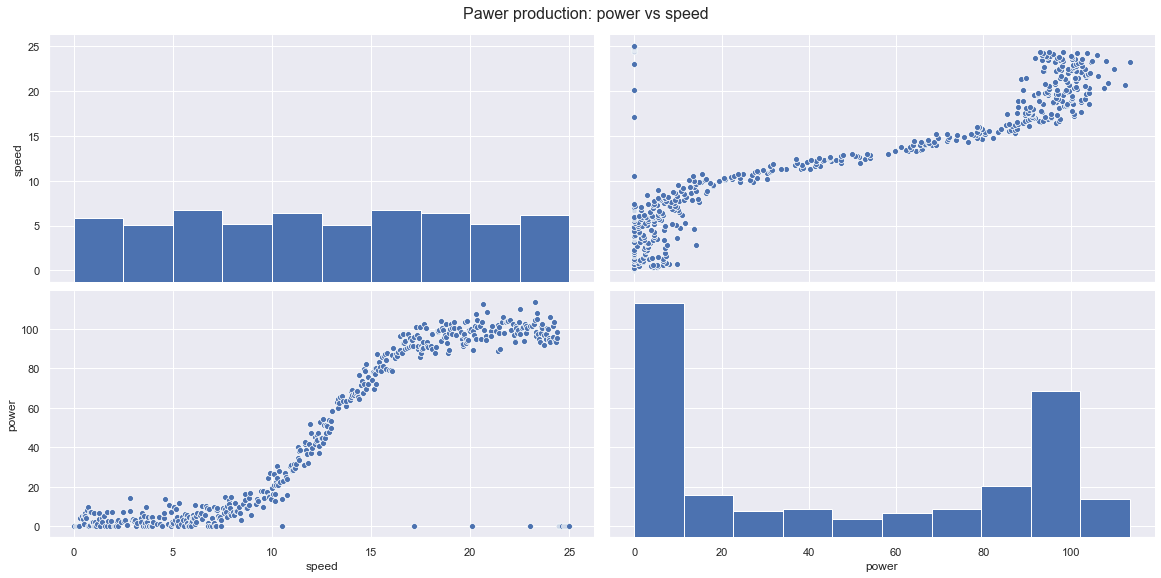

In [25]:
# sns.pairplot(df)
sns.pairplot(df, height=4, aspect=2, diag_kind="hist");
plt.suptitle("Pawer production: power vs speed", fontsize = 16) # Title
plt.subplots_adjust(top=0.93)
# Taken from: https://seaborn.pydata.org/generated/seaborn.pairplot.html, 02/01/2021

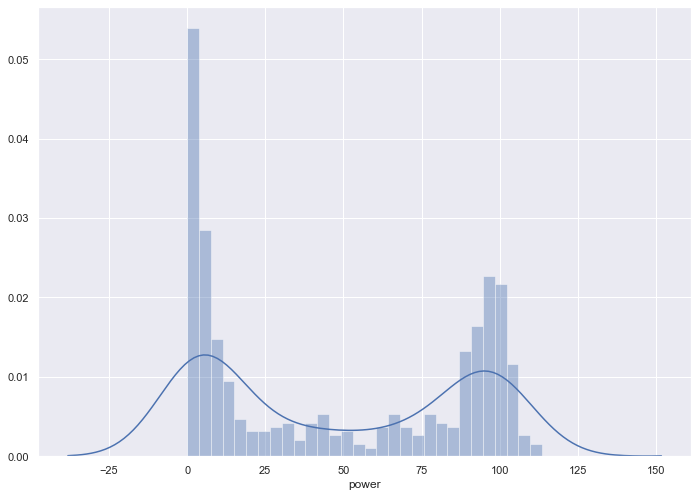

In [14]:
# plot histogram on 'power' and 'speed' (median value) using seaborn
# https://towardsdatascience.com/a-comprehensive-intro-to-data-visualization-with-seaborn-distribution-plots-888ff3436f36, 02/01/2021
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['power'], bins=30)

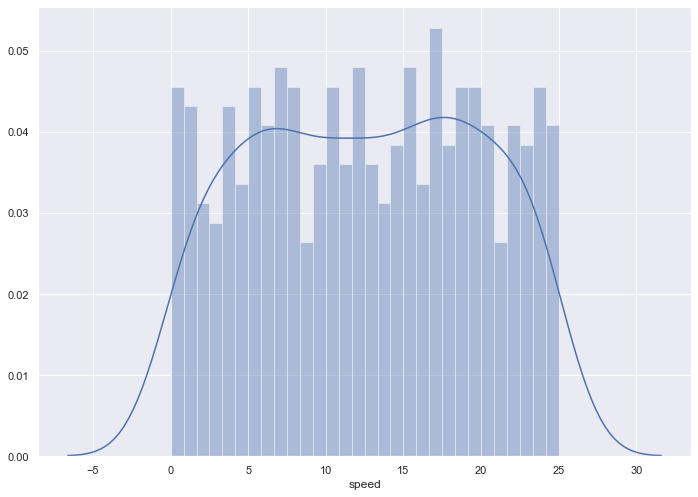

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['speed'], bins=30)

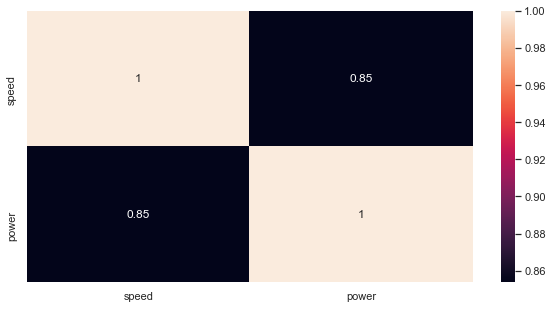

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))

sns.heatmap(data=correlation_matrix, annot=True)

### Linear Regression (the whole data)

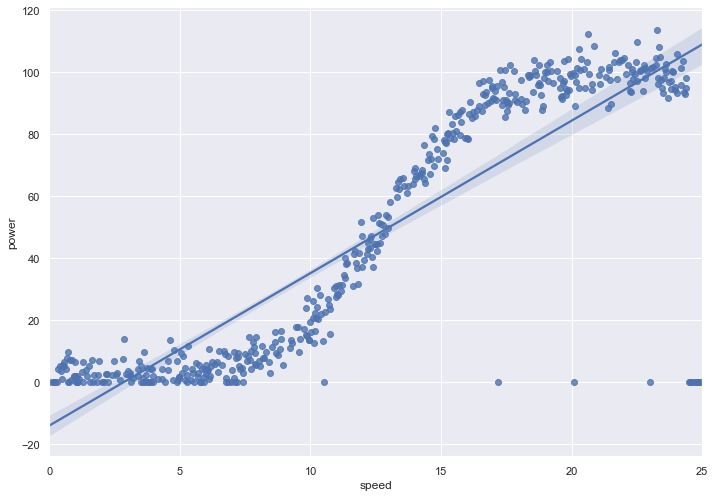

In [26]:
sns.regplot(x='speed',y='power',data = df) # Linear regression of the whole data
plt.show()

## Part 2: Clean the data

To continue I will get rid of 0.0 kW power data points. 

In [34]:
# Taken from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html, 02/01/2021
# and https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741, 02/01/2021
df2 = df.loc[(df['power'] == 0.0)] # data for which the power is equal to 0.0 KW
df2
# 49 zero values in the power column. 

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


### Cleaned dataset

In [45]:
df3 = df.loc[(df['power'] != 0.0)] # data for which the power is greater than 0.0 KW
df3
# the cleaned data contains 451 rows(values).

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [42]:
# I will check if there are any 0.0 values in 'speed' data points
df4 = df.loc[(df['speed'] == 0.0)] # data for which the power is equal to 0.0 m/s
df4
# output gives me 0, so it means there is no data which is equal to 0.0 in this case.

,speed,power
0,0.0,0.0


In [35]:
# describe the cleaned data 
# taken from: https://www.w3resource.com/pandas/dataframe/dataframe-describe.php, 02/01/2021
df3.describe().round(2)

,speed,power
count,451.00,451.00
mean,13.00,53.23
std,6.84,40.52
min,0.32,0.07
25%,7.34,8.54
50%,13.04,58.17
75%,18.78,94.73
max,24.40,113.56


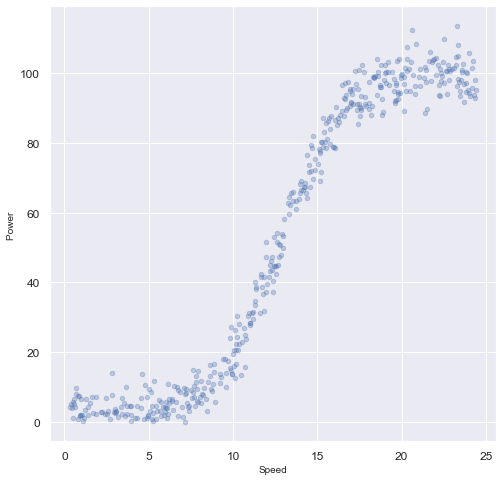

In [38]:
# plot the cleaned data 
df3.plot(x ='speed', y = 'power', kind ="scatter", figsize = [8,8], color ="b", alpha = 0.3, fontsize = 12)

plt.xlabel("Speed", fontsize = 10) 
plt.ylabel("Power ", fontsize = 10)
plt.show()

### Linear Regression 

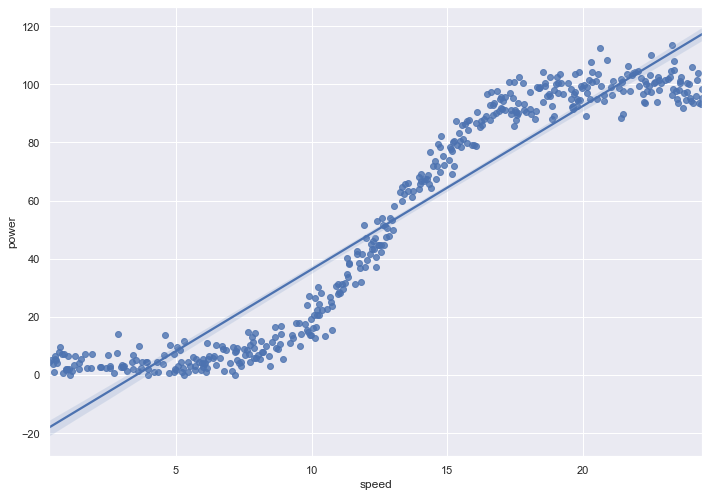

In [40]:
sns.regplot(x='speed',y='power',data = df3) # Linear regression of the cleaned data
plt.show()

## Part 3: Training on the data

#### Neural Networks in Keras

Keras is an open-source software library that provides a Python interface for artificial neural networks.[[1]](https://en.wikipedia.org/wiki/Keras) 
It is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.[[2]](https://keras.io/about/)

In [52]:
# Changing pandas dataframe to numpy array
# Taken from: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5, 02/01/2021
X = df3.iloc[:,0].values # speed
y = df3.iloc[:,1].values # power